# How do we proceed??

1. Design the Model (input and ouptut size, forward pass)
2. Construct loss and optimizer
3. Training loop
    - Forward pass: compute prediction
    - Backward pass: gradients
    - Update weights

In [15]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [3]:
# 0. Prepare the Data
x_values = [i for i in range(11)]
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [32]:
X_train = np.array(x_values, dtype = np.float32).reshape(-1, 1)  # convert into numpy array
X_train.shape

(11, 1)

In [12]:
y_values = [2*i+1 for i in x_values]
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [22]:
y_train = np.array(y_values, dtype = np.float32)
y_train

array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21.],
      dtype=float32)

In [23]:
y_train = y_train.reshape(-1, 1)
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

In [16]:
# 1. build the model

class LinearRegressionModel(nn.Module):
  def __init__(self, input_dim, output_dim):
    super(LinearRegressionModel, self).__init__()

    self.linear = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.linear(x)

In [17]:
# instantiate the model
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

In [18]:
# instantiate the loss
loss_fn = nn.MSELoss()

# optimizer
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [33]:
# train the model
epochs = 100

for epoch in range(epochs):
  epoch += 1
  # Convert numpy array to tensors
  inputs = torch.from_numpy(X_train).requires_grad_()
  labels = torch.from_numpy(y_train)

  # Forward to get output
  outputs = model(inputs)

  # Calculate Loss
  loss = loss_fn(outputs, labels)

  # Clear gradients w.r.t. parameters
  optimizer.zero_grad() # PyTorch accumulates gradients by default, so we clear old gradients before computing new ones.

  # Getting gradients w.r.t. parameters
  loss.backward()

  # Updating parameters
  optimizer.step()

  print('epoch {}, loss {}'.format(epoch, loss.item()))


epoch 1, loss 258.1175842285156
epoch 2, loss 21.12087059020996
epoch 3, loss 1.7890411615371704
epoch 4, loss 0.21146449446678162
epoch 5, loss 0.08205517381429672
epoch 6, loss 0.07077578455209732
epoch 7, loss 0.06914009898900986
epoch 8, loss 0.06829910725355148
epoch 9, loss 0.06753093749284744
epoch 10, loss 0.06677624583244324
epoch 11, loss 0.06603050976991653
epoch 12, loss 0.06529306620359421
epoch 13, loss 0.0645640566945076
epoch 14, loss 0.0638430118560791
epoch 15, loss 0.06313019245862961
epoch 16, loss 0.062425125390291214
epoch 17, loss 0.06172816455364227
epoch 18, loss 0.061038851737976074
epoch 19, loss 0.06035729497671127
epoch 20, loss 0.05968320742249489
epoch 21, loss 0.05901670828461647
epoch 22, loss 0.05835764482617378
epoch 23, loss 0.05770602077245712
epoch 24, loss 0.05706164613366127
epoch 25, loss 0.05642441660165787
epoch 26, loss 0.05579424276947975
epoch 27, loss 0.055171240121126175
epoch 28, loss 0.05455518141388893
epoch 29, loss 0.0539460629224777

In [35]:
# Purely inference
predicted = model(torch.from_numpy(X_train).requires_grad_()).data.numpy()
predicted

array([[ 0.7099939],
       [ 2.7517574],
       [ 4.793521 ],
       [ 6.8352847],
       [ 8.8770485],
       [10.918812 ],
       [12.960576 ],
       [15.002339 ],
       [17.044102 ],
       [19.085865 ],
       [21.127628 ]], dtype=float32)

In [36]:
y_train

array([[ 1.],
       [ 3.],
       [ 5.],
       [ 7.],
       [ 9.],
       [11.],
       [13.],
       [15.],
       [17.],
       [19.],
       [21.]], dtype=float32)

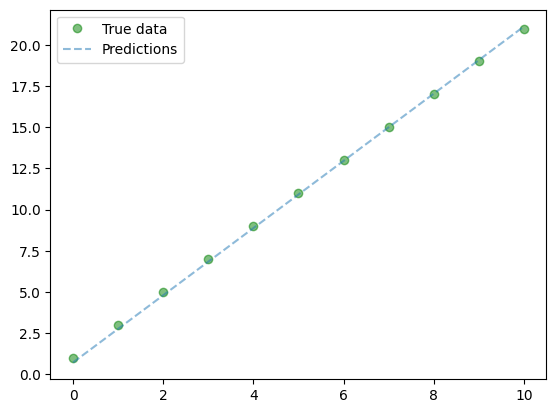

In [37]:
# Clear figure
plt.clf()

# Get predictions
predicted = model(torch.from_numpy(X_train).requires_grad_()).data.numpy()

# Plot true data
plt.plot(X_train, y_train, 'go', label='True data', alpha=0.5)

# Plot predictions
plt.plot(X_train, predicted, '--', label='Predictions', alpha=0.5)

# Legend and plot
plt.legend(loc='best')
plt.show()